**Import installed libraries and than use it**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import ttest_1samp, chi2_contingency
from scipy.integrate import odeint, solve_ivp


#### Load Sample Dataset for Solving this 

In [2]:
np.random.seed(42)

In [3]:
# Simulated dataset
data = pd.DataFrame({
    'PatientID': np.arange(1, 101),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 100),
    'CholesterolLevel': np.random.normal(210, 25, 100),
    'BloodPressure': np.random.normal(120, 10, 100),
    'RiskCategory': np.random.choice(['Low', 'Medium', 'High'], 100)
})

In [4]:
data['ConstantFeature'] = 1


In [5]:
data.loc[5:10, 'CholesterolLevel'] = np.nan


### Q1: Outlier Detection and Feature Reduction

In [6]:
from sklearn.feature_selection import VarianceThreshold


In [7]:
selector = VarianceThreshold()
data_var = selector.fit_transform(data.select_dtypes(include=np.number))
print("Remaining Features:", data.select_dtypes(include=np.number).columns[selector.get_support()])


Remaining Features: Index(['PatientID', 'CholesterolLevel', 'BloodPressure'], dtype='object')


In [8]:
data['CholesterolLevel'].fillna(data['CholesterolLevel'].mean(), inplace=True)

In [9]:
z_scores = np.abs(stats.zscore(data['CholesterolLevel']))
data = data[(z_scores < 3)]

### Q2: Data Visualization

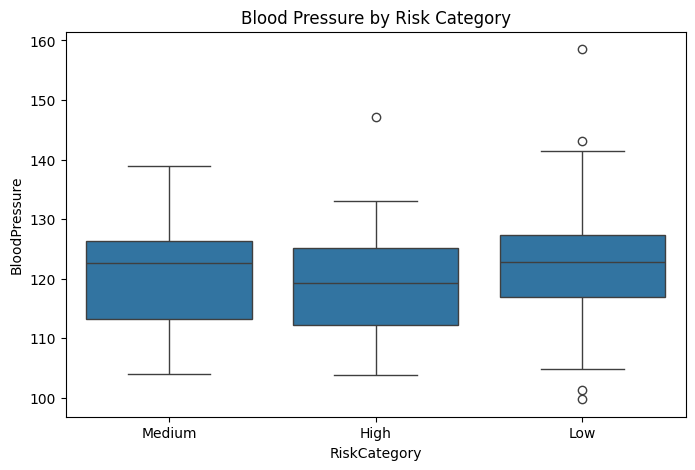

In [10]:
# Boxplot of BloodPressure by RiskCategory
plt.figure(figsize=(8, 5))
sns.boxplot(x='RiskCategory', y='BloodPressure', data=data)
plt.title("Blood Pressure by Risk Category")
plt.show()


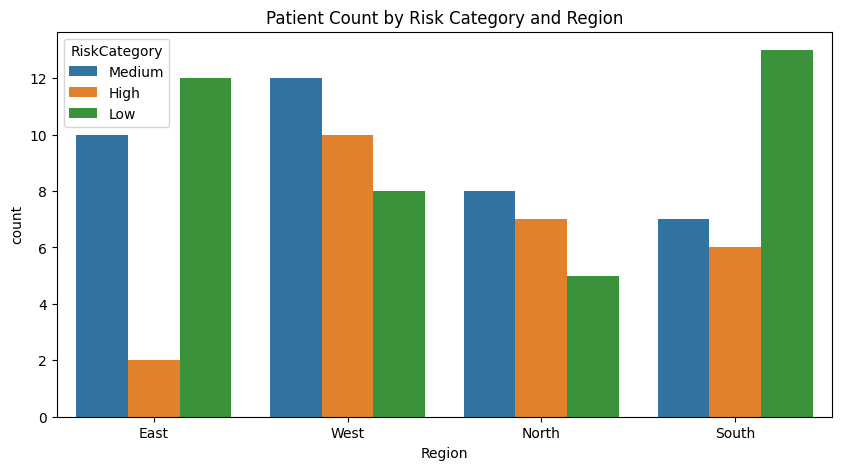

In [11]:
# Countplot of patients in each RiskCategory per Region
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', hue='RiskCategory', data=data)
plt.title("Patient Count by Risk Category and Region")
plt.show()

### Q3: Statistical Hypothesis Testing

#### One-sample t-test: CholesterolLevel vs 200 mg/dL ####

In [12]:
sample = data['CholesterolLevel'].sample(20)
t_stat, p_val = ttest_1samp(sample, 200)

print(f"T-statistic: {t_stat}, p-value: {p_val}")
print("Null Hypothesis: μ = 200")
print("Alternative Hypothesis: μ ≠ 200")

if p_val < 0.05:
    print("Reject H0: The average CholesterolLevel is significantly different from 200 mg/dL.")
else:
    print("Fail to Reject H0: No significant difference from 200 mg/dL.")


T-statistic: 2.543551967140544, p-value: 0.019828303023156073
Null Hypothesis: μ = 200
Alternative Hypothesis: μ ≠ 200
Reject H0: The average CholesterolLevel is significantly different from 200 mg/dL.


### Chi-square test: Region vs RiskCategory ###

In [13]:
contingency_table = pd.crosstab(data['Region'], data['RiskCategory'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")
print("Null Hypothesis: Region and RiskCategory are independent.")
print("Alternative Hypothesis: Region and RiskCategory are dependent.")

if p < 0.05:
    print("Reject H0: There is a significant relationship.")
else:
    print("Fail to Reject H0: No significant relationship.")


Chi2: 9.113145128934603, p-value: 0.1673141497758578
Null Hypothesis: Region and RiskCategory are independent.
Alternative Hypothesis: Region and RiskCategory are dependent.
Fail to Reject H0: No significant relationship.


#### Modeling a Health System with ODE ####

##### A) Solve with odeint #####

In [14]:
def model(C, t):
    k = 0.1
    D = 100
    dCdt = k * (D - C)
    return dCdt

t = np.linspace(0, 50, 100)
C0 = 0
C_odeint = odeint(model, C0, t)


##### B) Solve with solve_ivp #####

In [15]:
def model_ivp(t, C):
    k = 0.1
    D = 100
    return k * (D - C)

sol = solve_ivp(model_ivp, [0, 50], [0], t_eval=t)


##### C) Plot and Compare #####

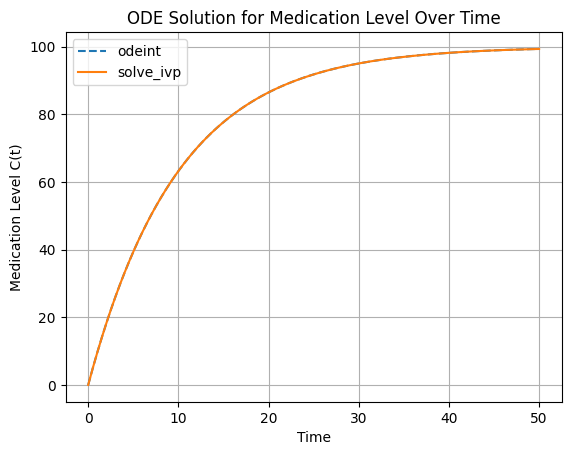

Both methods give similar results; solve_ivp provides more flexibility and is modern.


In [16]:
plt.plot(t, C_odeint, label='odeint', linestyle='--')
plt.plot(sol.t, sol.y[0], label='solve_ivp', linestyle='-')
plt.title("ODE Solution for Medication Level Over Time")
plt.xlabel("Time")
plt.ylabel("Medication Level C(t)")
plt.legend()
plt.grid(True)
plt.show()

print("Both methods give similar results; solve_ivp provides more flexibility and is modern.")
